In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
# from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [4]:

A1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A1_1.45M_EDA10%_250KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A1_1.45M_EDA10%_250KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A3_1.45M_EDA1%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A4_1.45M_EDA1%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A5 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A5_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A6 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A6_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)


In [ ]:
A1


In [ ]:
test = A4
plt.plot(test['XAxis'].values, test['Counts'].values/np.max(test['Counts'].values), label = 'A1', c= 'red')
plt.yscale('log')

In [12]:
A1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A1_1.45M_EDA10%_250KHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A1['Counts']), delimiter=',',index_col=False)
A2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A1_1.45M_EDA10%_250KHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A2['Counts']),delimiter=',',index_col=False)
A3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A3_1.45M_EDA1%_500KHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A3['Counts']),delimiter=',',index_col=False)
A4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A4_1.45M_EDA1%_500KHz_32ps.csv', names=['XAxis', 'Counts'],  skiprows=np.argmax(A4['Counts']),delimiter=',',index_col=False)
A5_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A5_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A5['Counts']),delimiter=',',index_col=False)
A6_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/6_01_22/A6_1.45M_EDA0%_500KHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A6['Counts']),delimiter=',',index_col=False)

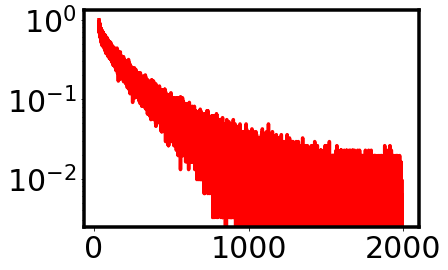

In [15]:
plt.plot(A5_fit['XAxis'].values, A5_fit['Counts'].values/np.max(A5_fit['Counts'].values), label = 'A1', c= 'red')
plt.yscale('log')

In [22]:
stretched_A1 = stretch_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A2 = stretch_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A3 = stretch_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A4 = stretch_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A5 = stretch_exp_fit(A5_fit['Counts'].values/np.max(A5_fit['Counts'].values), A5_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A6 = stretch_exp_fit(A6_fit['Counts'].values/np.max(A6_fit['Counts'].values), A6_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))



In [23]:
print("tau_c (ns) = "+str(stretched_A1[0]*1e9))
print("Beta = "+str(stretched_A1[1]))
print("avg. tau (ns) = "+str(stretched_A1[3]*1e9))

tau_c (ns) = 85.56450203091401
Beta = 0.5992949196284151
avg. tau (ns) = 128.93586341485965


In [24]:
stretched_A1

(8.556450203091401e-08,
 0.5992949196284151,
 0.9996491912315695,
 1.2893586341485965e-07,
 array([0.56341913, 0.56323603, 0.56305306, ..., 0.00111162, 0.00111155,
        0.00111148]))

In [28]:
double_A1 = double_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A2 = double_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A3 = double_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A4 = double_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A5 = double_exp_fit(A5_fit['Counts'].values/np.max(A5_fit['Counts'].values), A5_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A6 = double_exp_fit(A6_fit['Counts'].values/np.max(A6_fit['Counts'].values), A6_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

In [29]:
print("tau_1 (ns) = "+str(double_A2[0]*1e9))
print("a1 = "+str(double_A2[1]))
print("tau_2 (ns) = "+str(double_A2[2]*1e9))
print("a2 = "+str(double_A2[3]))
print("tau_avg (ns) = "+str(double_A2[4]*1e9))

tau_1 (ns) = 89.22674385310316
a1 = 0.989476214525996
tau_2 (ns) = 530.8964612535814
a2 = 0.09438890449150927
tau_avg (ns) = 127.68975926068019


In [30]:
double_A1

(8.926965961144056e-08,
 0.989212036394944,
 5.329243642865439e-07,
 0.09376878821807821,
 1.2768304893391442e-07,
 array([0.7652329 , 0.76498489, 0.76473698, ..., 0.00183278, 0.00183267,
        0.00183256]))

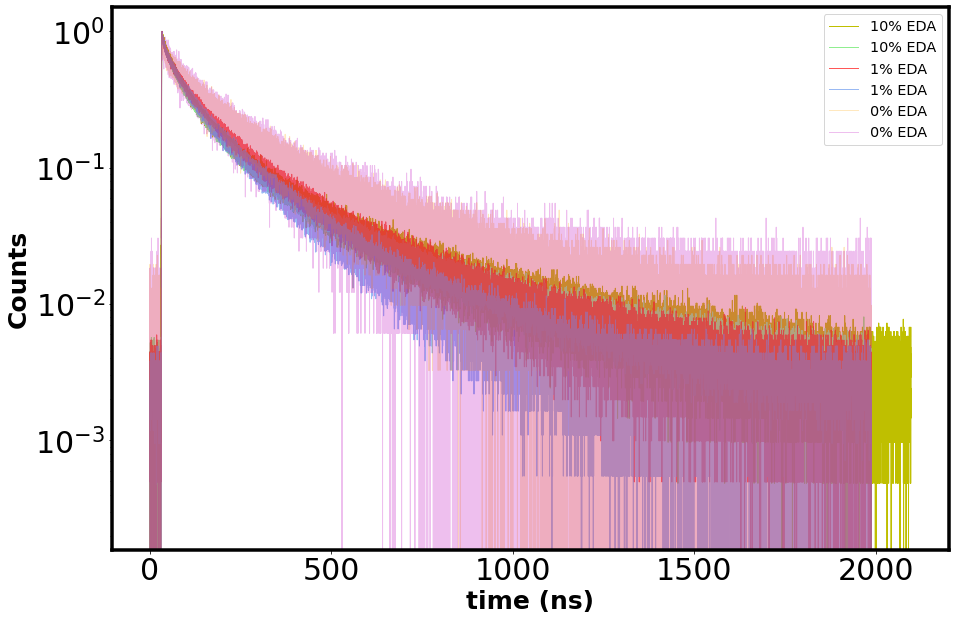

In [47]:
fig = plt.figure(figsize =(15, 10))

plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(A2['XAxis'].values, A2['Counts'].values/np.max(A2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 1)
plt.plot(A3['XAxis'].values, A3['Counts'].values/np.max(A3['Counts'].values),'r', lw=1 , label='A3', alpha = 0.66)
plt.plot(A4['XAxis'].values, A4['Counts'].values/np.max(A4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.66)
plt.plot(A5['XAxis'].values, A5['Counts'].values/np.max(A5['Counts'].values),'orange', lw=1 , label='A5', alpha = 0.25)
plt.plot(A6['XAxis'].values, A6['Counts'].values/np.max(A6['Counts'].values),'m', lw=1 , label='A6', alpha = 0.25)

plt.yscale('log')

fs = 25
plt.xlabel('time (ns)',{'fontsize': fs}, weight = "bold")
plt.ylabel('Counts',{'fontsize': fs}, weight = "bold")

plt.legend(["10% EDA","10% EDA", "1% EDA", "1% EDA", "0% EDA", "0% EDA"], fontsize = "x-large")

plt.show()

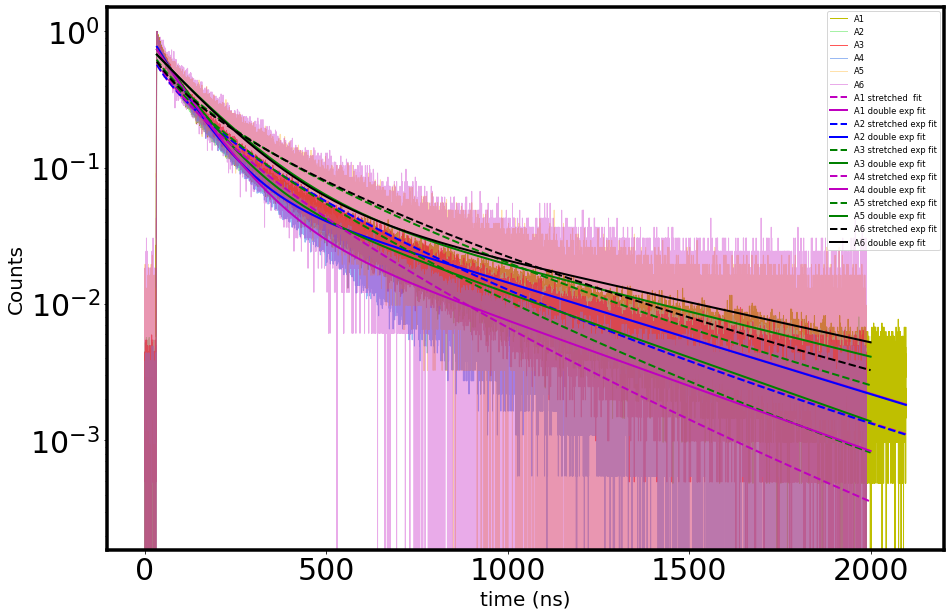

In [48]:

fig = plt.figure(figsize =(15, 10))

plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(A2['XAxis'].values, A2['Counts'].values/np.max(A2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 0.8)
plt.plot(A3['XAxis'].values, A3['Counts'].values/np.max(A3['Counts'].values),'r', lw=1 , label='A3', alpha = 0.66)
plt.plot(A4['XAxis'].values, A4['Counts'].values/np.max(A4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.66)
plt.plot(A5['XAxis'].values, A5['Counts'].values/np.max(A5['Counts'].values),'orange', lw=1 , label='A5', alpha = 0.33)
plt.plot(A6['XAxis'].values, A6['Counts'].values/np.max(A6['Counts'].values),'m', lw=1 , label='A6', alpha = 0.33)
plt.yscale('log')

plt.plot(A1_fit['XAxis'].values, stretched_A1[4], 'm--', lw = 2, label="A1 stretched  fit")
plt.plot(A1_fit['XAxis'].values, double_A1[5], 'm-', lw = 2, label="A1 double exp fit")

plt.plot(A2_fit['XAxis'].values, stretched_A2[4], 'b--', lw = 2, label="A2 stretched exp fit")
plt.plot(A2_fit['XAxis'].values, double_A2[5], 'b-', lw = 2, label="A2 double exp fit")

plt.plot(A3_fit['XAxis'].values, stretched_A3[4], 'g--', lw = 2, label="A3 stretched exp fit")
plt.plot(A3_fit['XAxis'].values, double_A3[5], 'g-', lw = 2, label="A3 double exp fit")

plt.plot(A4_fit['XAxis'].values, stretched_A4[4], 'm--', lw = 2, label="A4 stretched exp fit")
plt.plot(A4_fit['XAxis'].values, double_A4[5], 'm-', lw = 2, label="A4 double exp fit")

plt.plot(A5_fit['XAxis'].values, stretched_A5[4], 'g--', lw = 2, label="A5 stretched exp fit")
plt.plot(A5_fit['XAxis'].values, double_A5[5], 'g-', lw = 2, label="A5 double exp fit")

plt.plot(A6_fit['XAxis'].values, stretched_A6[4], 'k--', lw = 2, label="A6 stretched exp fit")
plt.plot(A6_fit['XAxis'].values, double_A6[5], 'k-', lw = 2, label="A6 double exp fit")

fs = 20
plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.legend(loc = "upper right", fontsize = "small")

plt.show()

In [34]:
T1plotdata = [
    1e9*np.array([double_A1[0],double_A2[0]]),
    1e9*np.array([double_A3[0],double_A4[0]]),
    1e9*np.array([double_A5[0],double_A6[0]]),                                                                                                               
    ]

T2plotdata = [
    1e9*np.array([double_A1[2],double_A2[2]]),
    1e9*np.array([double_A3[2],double_A4[2]]),
    1e9*np.array([double_A5[2],double_A6[2]]),                                                        
    ]

TAplotdata = [
    1e9*np.array([double_A1[4],double_A2[4]]),
    1e9*np.array([double_A3[4],double_A4[4]]),
    1e9*np.array([double_A5[4],double_A6[4]]),                                                  
    ]

TSplotdata = [
    1e9*np.array([stretched_A1[3],stretched_A2[3]]),
    1e9*np.array([stretched_A3[3],stretched_A4[3]]),
    1e9*np.array([stretched_A5[3],stretched_A6[3]]),
    ]

Bplotdata = [
    np.array([stretched_A1[1],stretched_A2[1]]),
    np.array([stretched_A3[1],stretched_A4[1]]),
    np.array([stretched_A5[1],stretched_A6[1]]),
    ]

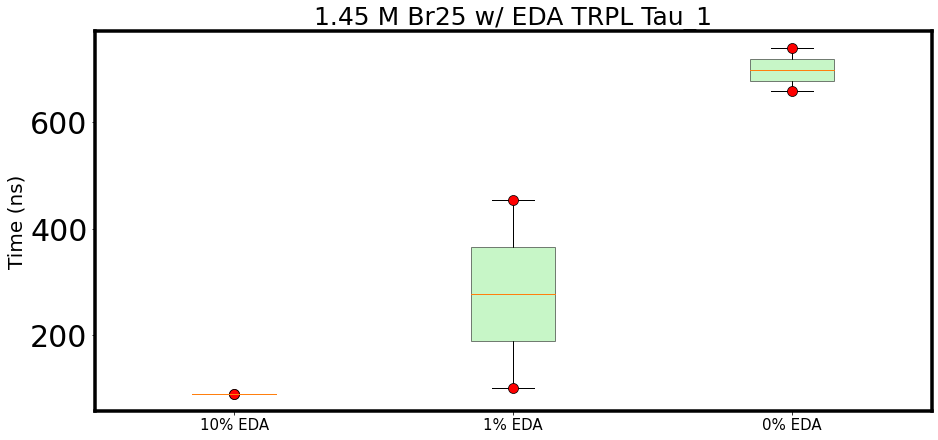

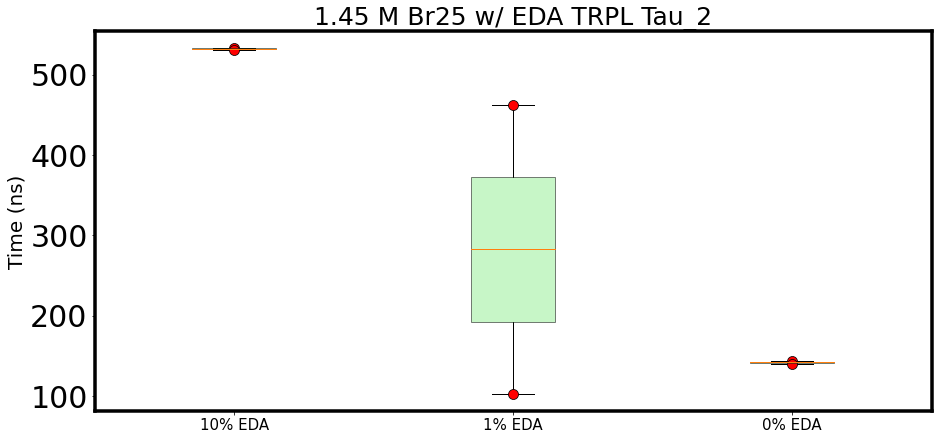

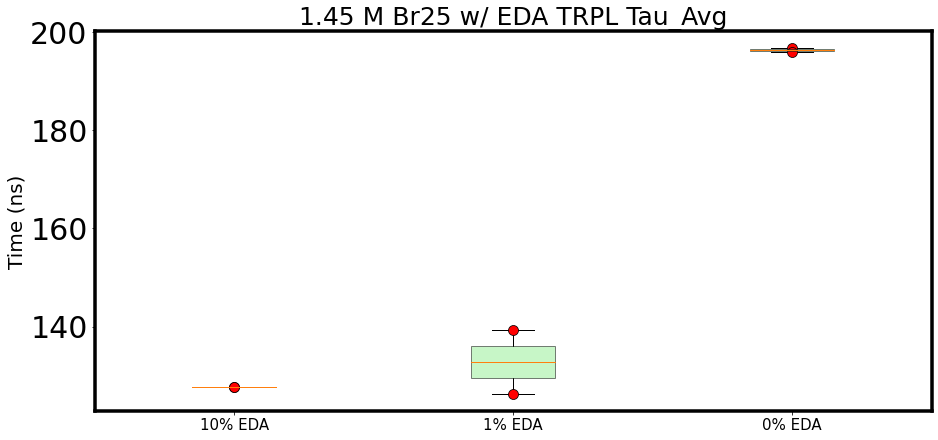

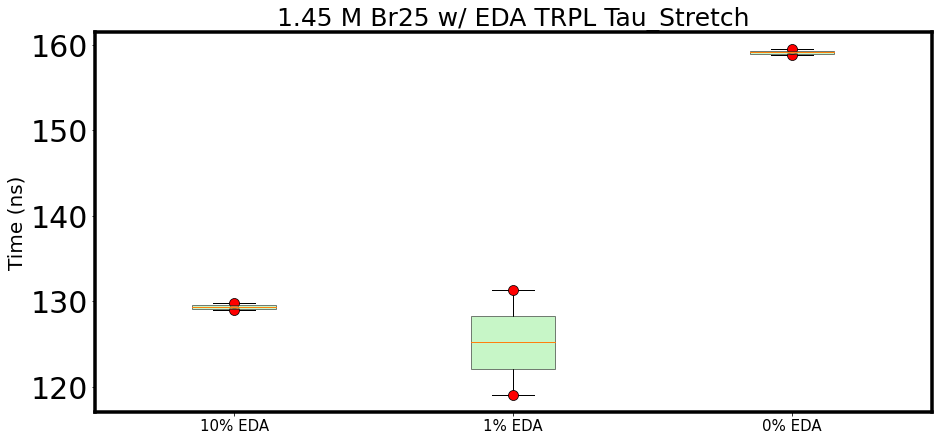

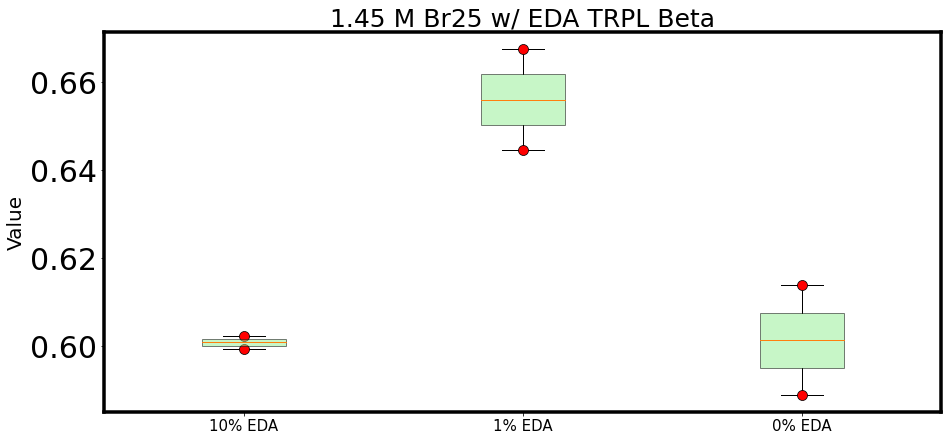

In [49]:
#############  Tau_1  ################
dotsize = 20
xsize = 15
ysize = 20
titlesize = 25
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(T1plotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3],T1plotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["10% EDA","1% EDA", "0% EDA"], fontsize = xsize)
plt.title("1.45 M Br25 w/ EDA TRPL Tau_1", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
################################################
#############  Tau_2  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(T2plotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3],T2plotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["10% EDA","1% EDA", "0% EDA"], fontsize = xsize)
plt.title("1.45 M Br25 w/ EDA TRPL Tau_2", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
################################################# 
#############  Tau_Avg  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TAplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3],TAplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75",)


ax.set_xticklabels(["10% EDA","1% EDA", "0% EDA"], fontsize = xsize)
plt.title("1.45 M Br25 w/ EDA TRPL Tau_Avg", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
################################################## 
#############  Tau_Stretch  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TSplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3],TSplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75")


ax.set_xticklabels(["10% EDA","1% EDA", "0% EDA"], fontsize = xsize)
plt.title("1.45 M Br25 w/ EDA TRPL Tau_Stretch", fontsize = titlesize)
plt.ylabel("Time (ns)", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()
print()
print()
print()
####################################################
#############  Beta  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(Bplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3],Bplotdata, ".", color = "r", ms = dotsize, mec = "k", mew = "0.75", )


ax.set_xticklabels(["10% EDA","1% EDA", "0% EDA"], fontsize = xsize)
plt.title("1.45 M Br25 w/ EDA TRPL Beta", fontsize = titlesize)
plt.ylabel("Value", fontsize = ysize)
# plt.legend(fontsize = "medium")
plt.show()